In [37]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
# Load the CSV file
user_data_path = "/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/merged_users.csv"
user_data = pd.read_csv(user_data_path)

In [39]:
#print the first rows in dataset
user_data.head()

,user_id,display_name,reputation,location,website_url,profile_image,user_type,link,account_id,is_employee,...,reputation_change_quarter,reputation_change_month,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,collective_names
0,109,Kalid,22690,"Seattle, WA",http://betterexplained.com,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,...,12,12,10,0,1217636447,88.0,46,45,14,NaN
1,347807,CristiC,22688,Romania,http://www.iapps.ro,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,...,50,50,10,0,1274533840,96.0,89,61,13,NaN
2,3427777,fantabolous,22686,NaN,NaN,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,...,20,20,0,0,1395038433,80.0,52,57,8,NaN
3,1858116,Gabriele Santomaggio,22682,Italy,NaN,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,...,0,0,0,0,1354057323,NaN,59,58,4,NaN
4,13767,Rafał Rawicki,22680,Poland,http://rawicki.org,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,...,20,20,0,0,1221598093,88.0,79,63,5,NaN


In [40]:
#info
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104800 entries, 0 to 104799
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    104800 non-null  int64  
 1   display_name               104783 non-null  object 
 2   reputation                 104800 non-null  int64  
 3   location                   74190 non-null   object 
 4   website_url                45636 non-null   object 
 5   profile_image              104800 non-null  object 
 6   user_type                  104800 non-null  object 
 7   link                       104800 non-null  object 
 8   account_id                 104800 non-null  int64  
 9   is_employee                104800 non-null  bool   
 10  last_modified_date         104756 non-null  float64
 11  last_access_date           104800 non-null  int64  
 12  reputation_change_year     104800 non-null  int64  
 13  reputation_change_quarter  10

#### Description of Columns in the User Data

| **Column Name**            | **Description**                                                                                           |
|----------------------------|-----------------------------------------------------------------------------------------------------------|
| **user_id**                | Unique identifier for the user on Stack Overflow.                                                         |
| **display_name**           | The name displayed publicly on the user's profile.                                                         |
| **reputation**             | The user's reputation score based on their contributions and interactions on the platform.                 |
| **location**               | The user's location, if provided.                                                                          |
| **website_url**            | The user's personal or professional website URL.                                                           |
| **profile_image**          | URL link to the user's profile image.                                                                      |
| **user_type**              | Type of user (e.g., `registered`, `moderator`, etc.).                                                      |
| **link**                   | URL link to the user's profile page on Stack Overflow.                                                     |
| **account_id**             | A unique identifier for the user's account, shared across Stack Exchange sites.                            |
| **is_employee**            | Indicates if the user is a Stack Overflow employee (Boolean).                                              |
| **last_modified_date**     | The date and time when the user's profile was last updated.                                                |
| **last_access_date**       | The date and time when the user last accessed their profile.                                               |
| **reputation_change_year** | The change in the user's reputation within the current year.                                               |
| **reputation_change_quarter** | The change in the user's reputation within the current quarter.                                         |
| **reputation_change_month** | The change in the user's reputation within the current month.                                             |
| **reputation_change_week** | The change in the user's reputation within the current week.                                               |
| **reputation_change_day**  | The change in the user's reputation within the current day.                                                |
| **creation_date**          | The date and time when the user's account was created.                                                     |
| **accept_rate**            | The percentage of the user's questions that have accepted answers (if applicable).                         |
| **badge_bronze**           | The number of bronze badges earned by the user.                                                            |
| **badge_silver**           | The number of silver badges earned by the user.                                                            |
| **badge_gold**             | The number of gold badges earned by the user.                                                              |
| **collective_names**       | Names of the collectives (communities or groups) the user is part of.                                      |


In [41]:
#descriptive
user_data.describe()

,user_id,reputation,account_id,last_modified_date,last_access_date,reputation_change_year,reputation_change_quarter,reputation_change_month,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,collective_names
count,1.048000e+05,1.048000e+05,1.048000e+05,1.047560e+05,1.048000e+05,104800.000000,104800.000000,104800.000000,104800.000000,104800.000000,1.048000e+05,75132.000000,104800.000000,104800.000000,104800.000000,0.0
mean,1.924410e+06,1.240875e+04,2.192943e+06,1.696000e+09,1.693436e+09,16.393111,16.393273,16.393550,1.742996,0.031174,1.327989e+09,74.955186,63.490029,46.360763,7.297691,NaN
std,2.576204e+06,3.055248e+04,3.466564e+06,4.244733e+07,9.090565e+07,55.627572,55.627555,55.627481,7.950979,0.599407,7.887078e+07,19.089800,81.068876,65.806706,12.327416,NaN
min,1.000000e+00,2.942000e+03,1.000000e+00,1.432144e+09,1.217552e+09,-972.000000,-972.000000,-972.000000,-490.000000,-35.000000,1.217514e+09,0.000000,2.000000,2.000000,0.000000,NaN
25%,3.039398e+05,3.913000e+03,1.156750e+05,1.676962e+09,1.696889e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.268051e+09,64.000000,30.000000,25.000000,2.000000,NaN
50%,9.751215e+05,5.765000e+03,8.731570e+05,1.715358e+09,1.735822e+09,8.000000,8.000000,8.000000,0.000000,0.000000,1.316044e+09,78.000000,46.000000,34.000000,4.000000,NaN
75%,2.446218e+06,1.070925e+04,2.704492e+06,1.725974e+09,1.737999e+09,20.000000,20.000000,20.000000,0.000000,0.000000,1.369501e+09,89.000000,72.000000,50.000000,8.000000,NaN
max,2.514732e+07,1.499240e+06,3.190323e+07,1.738115e+09,1.738119e+09,4670.000000,4670.000000,4670.000000,495.000000,25.000000,1.714156e+09,100.000000,9317.000000,9282.000000,888.000000,NaN


In [42]:
# Calculate the percentage of missing values for each column
missing_percentage = user_data.isnull().sum() / len(user_data) * 100

# Display columns with missing values and their percentages
missing_summary = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Missing Values Percentage per Column:\n")
print(missing_summary)

Missing Values Percentage per Column:

collective_names      100.000000
website_url            56.454198
location               29.208015
accept_rate            28.309160
last_modified_date      0.041985
display_name            0.016221
dtype: float64


In [43]:
#Based on the above missing values percentage collective names column is completely empty. It's good to drop that column
user_data = user_data.drop('collective_names', axis=1)
print("Column 'collective_names' has been dropped.")

Column 'collective_names' has been dropped.


In [44]:
# Website url data doesn't play an important role to the future analysis and prediction as its an extrenal site and not mandatory to have all users
user_data = user_data.drop('website_url', axis=1)
print("Column 'website_url' has been dropped.")

Column 'website_url' has been dropped.


In [45]:
# Get the number of unique values
num_unique_locations = user_data['location'].nunique()

print(f"Number of unique locations: {num_unique_locations}")


Number of unique locations: 11933


In [46]:
# Assuming the dataframe is named user_data
# Replace 'user_data' with your actual dataframe name
unique_locations = user_data['location'].dropna().unique()

# Convert to DataFrame for a tabular display
location_df = pd.DataFrame(unique_locations, columns=['Unique Locations'])

# Print in tabular format
print(location_df.to_markdown(tablefmt="grid"))


+-------+--------------------------------------------------------------------------------------------------------------+
|       | Unique Locations                                                                                             |
+=======+==============================================================================================================+
|     0 | Seattle, WA                                                                                                  |
+-------+--------------------------------------------------------------------------------------------------------------+
|     1 | Romania                                                                                                      |
+-------+--------------------------------------------------------------------------------------------------------------+
|     2 | Italy                                                                                                        |
+-------+-----------------------

In [47]:
#according to the above given location data. It is good to drop the column as there is so much of redundent information
user_data = user_data.drop('location', axis=1)
print("Column 'location' has been dropped.")

Column 'location' has been dropped.


In [48]:
#filling with median for missing values in accept_rate
user_data['accept_rate'].fillna(user_data['accept_rate'].median(), inplace=True)


/var/folders/tr/rny836212c3czy_464g2sdjr0000gn/T/ipykernel_97158/896785829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_data['accept_rate'].fillna(user_data['accept_rate'].median(), inplace=True)


In [49]:
user_data['last_modified_date'].fillna(user_data['last_modified_date'].median(), inplace=True)

/var/folders/tr/rny836212c3czy_464g2sdjr0000gn/T/ipykernel_97158/1684198739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_data['last_modified_date'].fillna(user_data['last_modified_date'].median(), inplace=True)


In [50]:
# Fill missing display_name values with 'username_{user_id}'
user_data['display_name'] = user_data.apply(
    lambda row: f"username_{row['user_id']}" if pd.isna(row['display_name']) else row['display_name'], axis=1
)

# Verify that there are no missing values left in display_name
print(user_data['display_name'].isna().sum())


0


In [51]:
#checking again missing values
missing_percentage = user_data.isnull().sum() / len(user_data) * 100
missing_summary = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Missing Values Percentage per Column:\n")
print(missing_summary)

Missing Values Percentage per Column:

Series([], dtype: float64)


Hence, Missing values are handled

In [52]:
user_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,reputation_change_year,reputation_change_quarter,reputation_change_month,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,1.737141e+09,1444512772,12,12,12,10,0,1217636447,88.0,46,45,14
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,1.712641e+09,1737604339,50,50,50,10,0,1274533840,96.0,89,61,13
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,1.729887e+09,1733717460,20,20,20,0,0,1395038433,80.0,52,57,8
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,1.703516e+09,1737987561,0,0,0,0,0,1354057323,78.0,59,58,4
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,1.715166e+09,1688549881,20,20,20,0,0,1221598093,88.0,79,63,5


In [53]:
print("Number of duplicate rows:", user_data.duplicated().sum())
user_data = user_data.drop_duplicates()

Number of duplicate rows: 0


In [54]:
# Convert timestamp columns to datetime format
user_data['creation_date'] = pd.to_datetime(user_data['creation_date'], unit='s')
user_data['last_modified_date'] = pd.to_datetime(user_data['last_modified_date'], unit='s')
user_data['last_access_date'] = pd.to_datetime(user_data['last_access_date'], unit='s')

# Display the updated DataFrame
print(user_data[['creation_date', 'last_modified_date', 'last_access_date']].head())

        creation_date  last_modified_date    last_access_date
0 2008-08-02 00:20:47 2025-01-17 19:05:00 2015-10-10 21:32:52
1 2010-05-22 13:10:40 2024-04-09 05:40:03 2025-01-23 03:52:19
2 2014-03-17 06:40:33 2024-10-25 20:10:00 2024-12-09 04:11:00
3 2012-11-27 23:02:03 2023-12-25 15:00:00 2025-01-27 14:19:21
4 2008-09-16 20:48:13 2024-05-08 11:00:00 2023-07-05 09:38:01


In [55]:
user_data['account_age_days'] = (datetime.now() - user_data['creation_date']).dt.days
user_data['account_age_years'] = (user_data['account_age_days'] / 365.25).round(1)
print(user_data[['creation_date', 'account_age_days', 'account_age_years']].head())

        creation_date  account_age_days  account_age_years
0 2008-08-02 00:20:47              6029               16.5
1 2010-05-22 13:10:40              5370               14.7
2 2014-03-17 06:40:33              3976               10.9
3 2012-11-27 23:02:03              4450               12.2
4 2008-09-16 20:48:13              5983               16.4


In [56]:
print(user_data.dtypes)

user_id                               int64
display_name                         object
reputation                            int64
profile_image                        object
user_type                            object
link                                 object
account_id                            int64
is_employee                            bool
last_modified_date           datetime64[ns]
last_access_date             datetime64[ns]
reputation_change_year                int64
reputation_change_quarter             int64
reputation_change_month               int64
reputation_change_week                int64
reputation_change_day                 int64
creation_date                datetime64[ns]
accept_rate                         float64
badge_bronze                          int64
badge_silver                          int64
badge_gold                            int64
account_age_days                      int64
account_age_years                   float64
dtype: object


In [57]:
categorical_columns = user_data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['display_name', 'profile_image', 'user_type', 'link'], dtype='object')


In [58]:
columns_list = user_data.columns
print(columns_list)

Index(['user_id', 'display_name', 'reputation', 'profile_image', 'user_type',
       'link', 'account_id', 'is_employee', 'last_modified_date',
       'last_access_date', 'reputation_change_year',
       'reputation_change_quarter', 'reputation_change_month',
       'reputation_change_week', 'reputation_change_day', 'creation_date',
       'accept_rate', 'badge_bronze', 'badge_silver', 'badge_gold',
       'account_age_days', 'account_age_years'],
      dtype='object')


In [59]:
invalid_accept_rate = user_data[(user_data['accept_rate'] < 0) | (user_data['accept_rate'] > 100)]
print("Invalid 'accept_rate' values:")
print(invalid_accept_rate)
user_data.loc[(user_data['accept_rate'] < 0) | (user_data['accept_rate'] > 100), 'accept_rate'] = np.nan
median_accept_rate = user_data['accept_rate'].median()
user_data['accept_rate'].fillna(median_accept_rate, inplace=True)
print("Invalid 'accept_rate' entries corrected.")

Invalid 'accept_rate' values:
Empty DataFrame
Columns: [user_id, display_name, reputation, profile_image, user_type, link, account_id, is_employee, last_modified_date, last_access_date, reputation_change_year, reputation_change_quarter, reputation_change_month, reputation_change_week, reputation_change_day, creation_date, accept_rate, badge_bronze, badge_silver, badge_gold, account_age_days, account_age_years]
Index: []

[0 rows x 22 columns]
Invalid 'accept_rate' entries corrected.


/var/folders/tr/rny836212c3czy_464g2sdjr0000gn/T/ipykernel_97158/669673190.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_data['accept_rate'].fillna(median_accept_rate, inplace=True)


After checking there are no invalid accept rates

In [71]:
negative_account_ids = user_data[user_data['account_id'] < 0]
negative_user_ids = user_data[user_data['user_id'] < 0]
if not negative_account_ids.empty:
    print("Negative values found in account_id:")
    print(negative_account_ids[['account_id']])
else:
    print("No negative values found in account_id.")

if not negative_user_ids.empty:
    print("\nNegative values found in user_id:")
    print(negative_user_ids[['user_id']])
else:
    print("\nNo negative values found in user_id.")


No negative values found in account_id.

No negative values found in user_id.


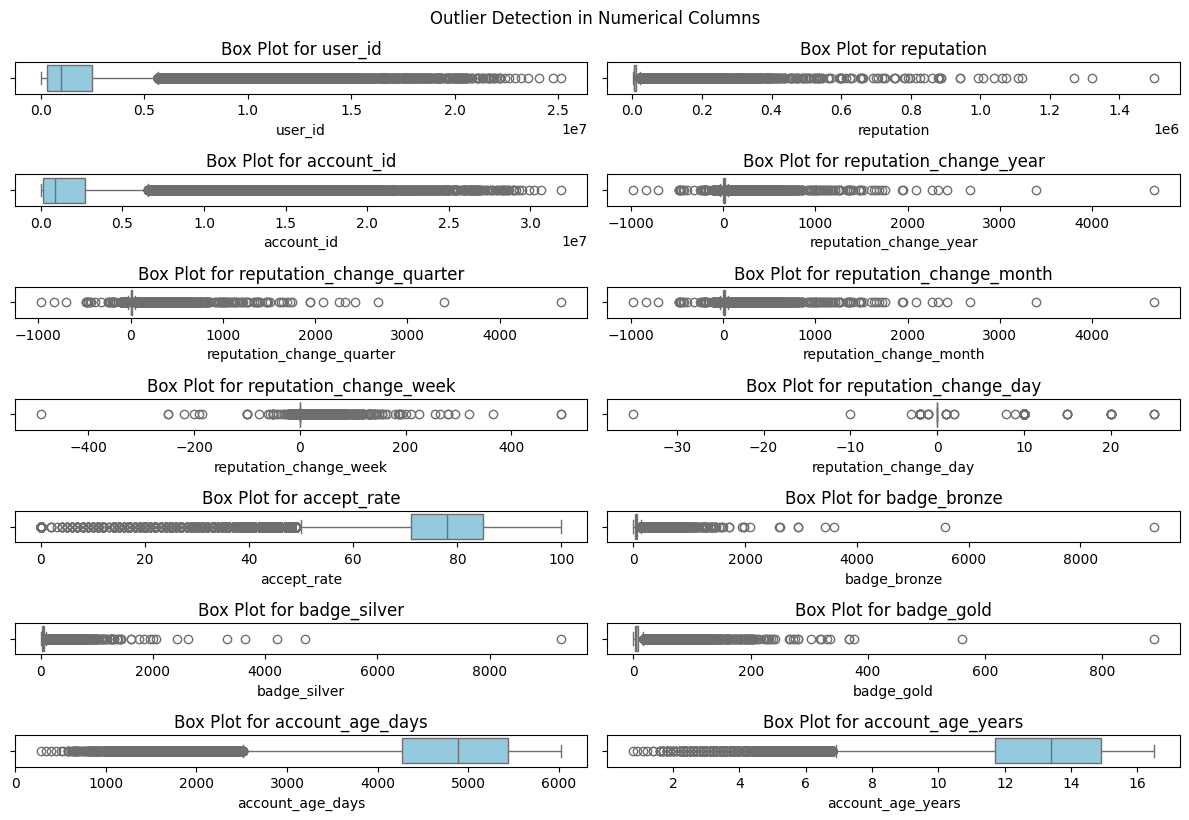

In [72]:
# Select numerical columns from the dataset
numerical_columns = user_data.select_dtypes(include=['int64', 'float64']).columns

# Generate box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)
    sns.boxplot(x=user_data[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.suptitle('Outlier Detection in Numerical Columns', y=1.02)
plt.show()


Box plots generated for all numerical columns to visually assess the presence of outliers in the dataset. Outliers were observed across several key fields, including user reputation, account age, badge counts, and reputation changes. These data points likely represent unique cases, such as top contributors, highly active users, or those with extensive engagement over time.

Rather than removing or modifying these outliers, they are retained to preserve the integrity of the data. Since each data point reflects actual user behavior on the platform, removing them may result in the loss of valuable insights.

Maybe based in future in process of fine tuning model, I might handle them. But for now felt its good to hold.

Normalization, standardization encoding steps will be performed in further milestones as per the model requirements

In [73]:
output_file_path = "/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv"
user_data.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"Cleaned data has been saved to {output_file_path}")

Cleaned data has been saved to /Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv


Visualizations

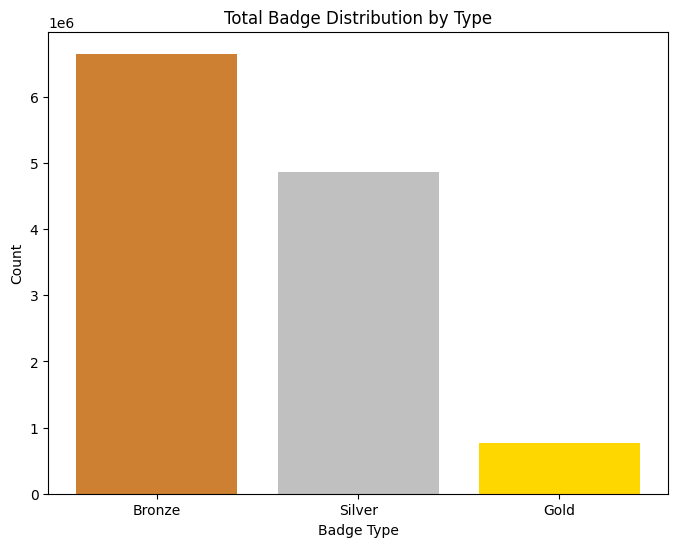

In [60]:
#Total Badge Count by Type
badge_totals = {
    'Bronze': user_data['badge_bronze'].sum(),
    'Silver': user_data['badge_silver'].sum(),
    'Gold': user_data['badge_gold'].sum()
}

plt.figure(figsize=(8, 6))
plt.bar(badge_totals.keys(), badge_totals.values(), color=['#cd7f32', '#c0c0c0', '#ffd700'])
plt.xlabel('Badge Type')
plt.ylabel('Count')
plt.title('Total Badge Distribution by Type')
plt.show()

Distribution Shape: The badge distribution reveals that bronze badges are the most abundant, followed by silver, while gold badges are comparatively rare.

Central Tendency: The large difference in badge counts between the types highlights that users are more frequently awarded lower-tier bronze badges.

Spread: There is a significant disparity between the counts of bronze, silver, and gold badges, with a noticeable gap particularly between bronze and gold.

Outliers: No significant outliers are observed, as the distribution aligns with the expected hierarchy of badge difficulty and rarity.

Overall Interpretation: The graph underscores that while users are commonly rewarded with bronze and silver badges, gold badges remain reserved for top achievements and contributors, reflecting the platform's recognition system.

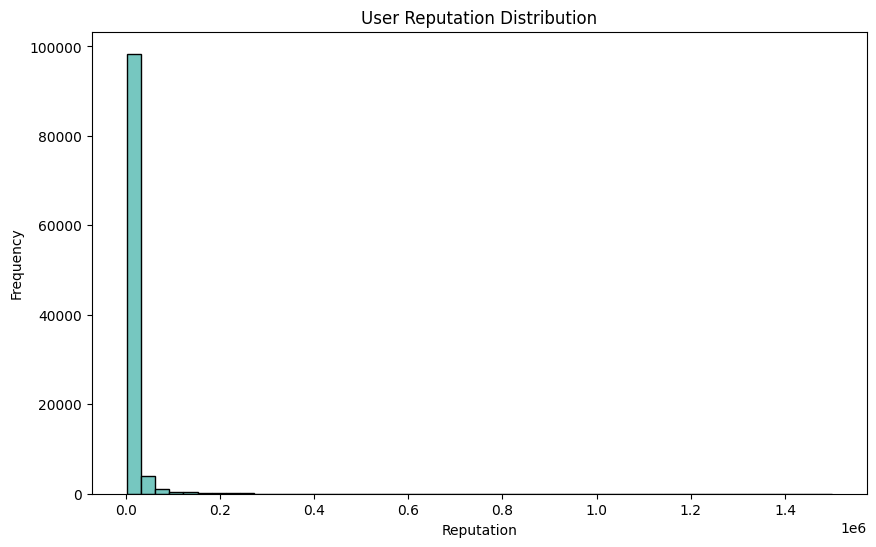

In [61]:
#Reputation Distribution
plt.figure(figsize=(10, 6))
plt.hist(user_data['reputation'], bins=50, color='#76c7c0', edgecolor='black')
plt.xlabel('Reputation')
plt.ylabel('Frequency')
plt.title('User Reputation Distribution')
plt.show()

Distribution Shape: The reputation distribution is heavily right-skewed, with most users possessing low reputation scores.

Central Tendency: The bulk of users have reputations near zero, indicating a significant clustering at the lower end of the scale.

Spread: Reputation values vary greatly, extending to over 1.4 million, which reflects a substantial difference between low and high-reputation users.

Outliers: A select few users with extremely high reputations serve as outliers, typically reflecting either substantial contributions or extended activity on the platform.

Overall Interpretation: The distribution shows that the majority of users are either new or less active on the platform, while a small core group has earned high recognition through sustained engagement.

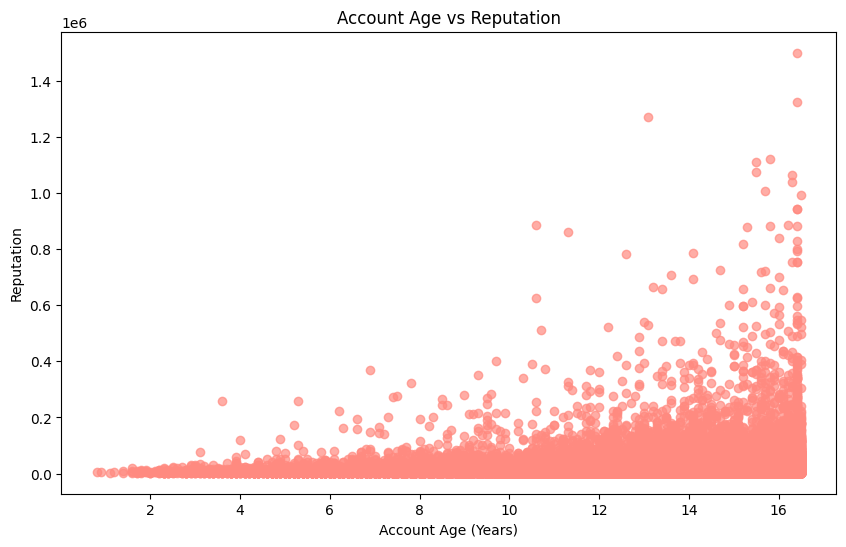

In [62]:
#Account Age vs Reputation
plt.figure(figsize=(10, 6))
plt.scatter(user_data['account_age_years'], user_data['reputation'], color='#ff8a80', alpha=0.7)
plt.xlabel('Account Age (Years)')
plt.ylabel('Reputation')
plt.title('Account Age vs Reputation')
plt.show()

Visualization: A scatterplot representing the relationship between account age (in years) and user reputation, with points displayed in light red for clarity.

Insight: The scatterplot indicates a positive correlation between account age and reputation. While older accounts generally have higher reputations, a large number of users with older accounts still have low reputations. This suggests that reputation growth depends more on consistent contributions over time rather than merely the duration of account existence.

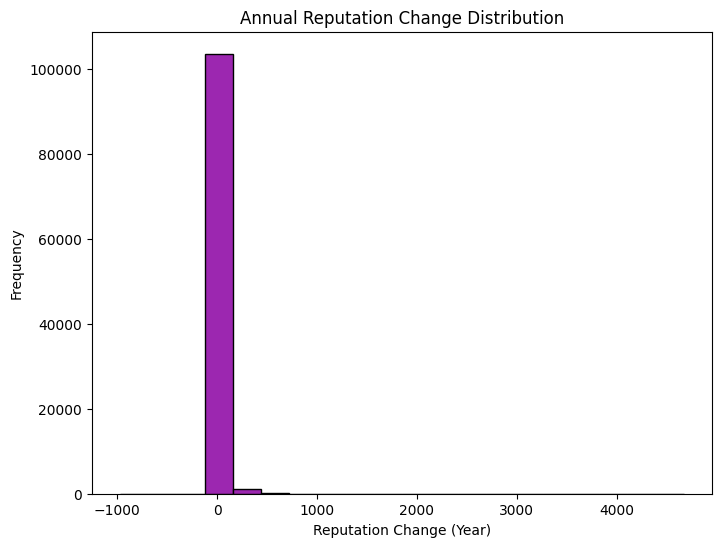

In [63]:
#Reputation Change Over the Year
plt.figure(figsize=(8, 6))
plt.hist(user_data['reputation_change_year'], bins=20, color='#9c27b0', edgecolor='black')
plt.xlabel('Reputation Change (Year)')
plt.ylabel('Frequency')
plt.title('Annual Reputation Change Distribution')
plt.show()

Distribution Shape: The annual reputation change distribution is highly skewed, with the majority of users experiencing minimal to zero change in their reputation.

Central Tendency: Reputation changes are predominantly centered near zero, suggesting that most users see little to no yearly variation in their reputation.

Spread: The values for reputation change cover a wide range, indicating that some users have significant fluctuations, either positive or negative.

Outliers: A small group of users shows large positive increases in reputation, reflecting exceptional contributions or high activity within the year.

Overall Interpretation: The distribution highlights that while most users remain stable in terms of reputation, a select few stand out due to notable contributions that drive substantial yearly reputation changes.

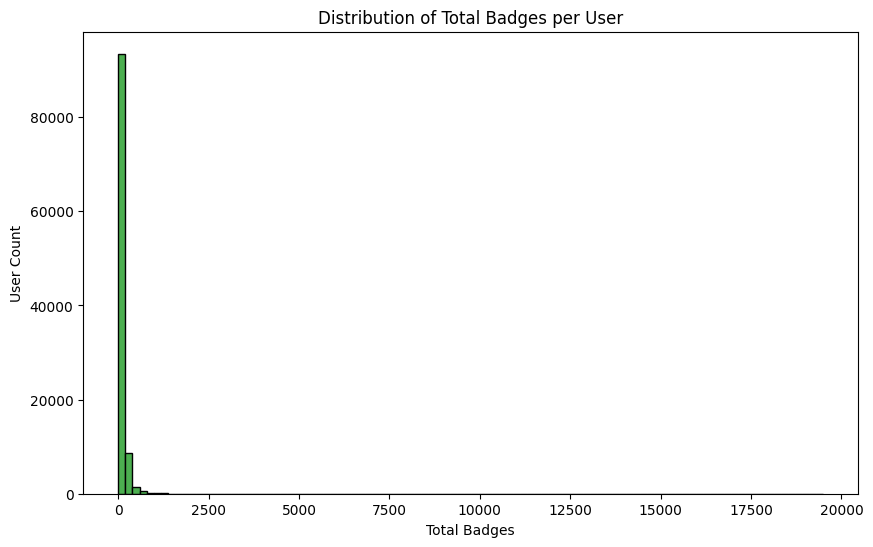

In [64]:
#Badge Counts by User
badge_data = user_data[['badge_bronze', 'badge_silver', 'badge_gold']].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(badge_data, bins=100, color='#4caf50', edgecolor='black')
plt.xlabel('Total Badges')
plt.ylabel('User Count')
plt.title('Distribution of Total Badges per User')
plt.show()

Distribution Shape: The distribution of total badges per user is highly skewed, with the majority of users possessing very few badges.

Central Tendency: Most users have a badge count close to zero, suggesting minimal recognition or contributions.

Spread: The badge count varies significantly, ranging from 0 to over 10,000, highlighting a wide disparity in user achievements.

Outliers: A small number of users have exceptionally high badge counts, representing highly active and impactful contributors.

Overall Interpretation: The distribution indicates that while a select few users achieve significant recognition, most users have minimal engagement or contribution on the platform, as reflected by their limited badge counts.

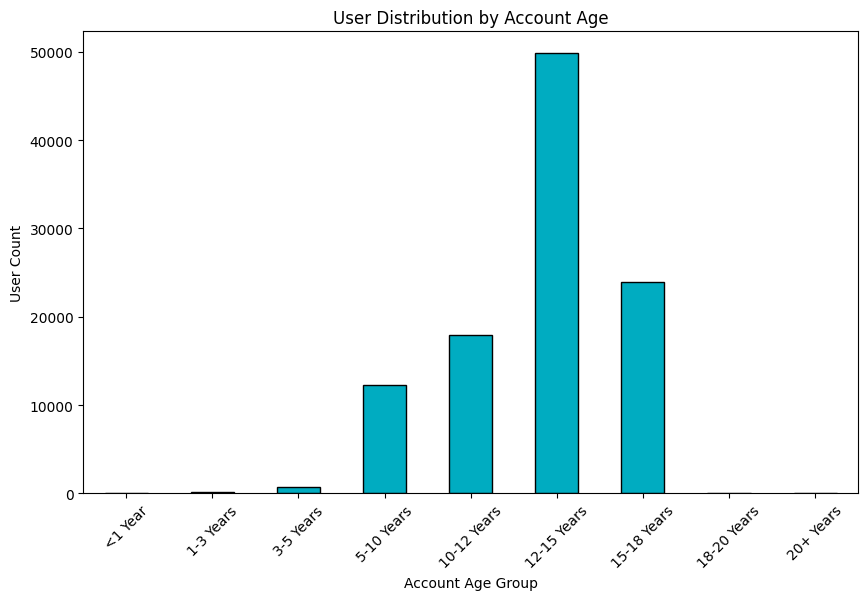

In [65]:
# User Count by Account Age Range
age_bins = [0, 1, 3, 5, 10, 12, 15, 18, 20, float('inf')]
age_labels = ['<1 Year', '1-3 Years', '3-5 Years', '5-10 Years', '10-12 Years', '12-15 Years', '15-18 Years', '18-20 Years', '20+ Years']
user_data['age_group'] = pd.cut(user_data['account_age_years'], bins=age_bins, labels=age_labels, include_lowest=True)

plt.figure(figsize=(10, 6))
user_data['age_group'].value_counts().sort_index().plot(kind='bar', color='#00acc1', edgecolor='black')
plt.xlabel('Account Age Group')
plt.ylabel('User Count')
plt.title('User Distribution by Account Age')
plt.xticks(rotation=45)
plt.show()

Distribution Shape: The distribution shows a peak in user count for accounts aged between 12 to 15 years, with a steady decrease in older and newer accounts.

Central Tendency: The majority of users fall within the 10 to 18-year account age groups, indicating a high concentration of long-standing users.

Spread: The user base is unevenly spread, with fewer users in the less than 1-year and greater than 20-year account age ranges.
Outliers: The newest accounts (less than 1 year old) and the oldest accounts (over 20 years old) have minimal representation.
Overall Interpretation: The platform shows strong user engagement and retention among long-term users, with a significant portion of its user base having accounts aged over a decade.

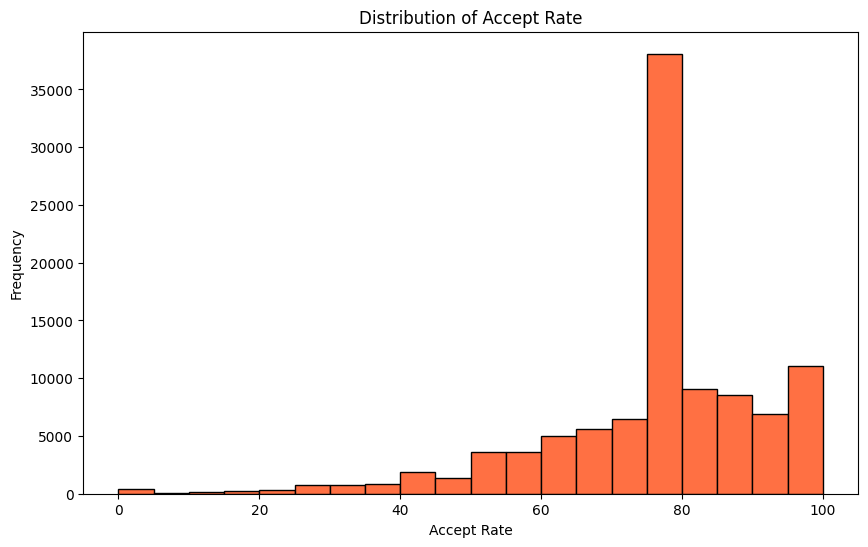

In [66]:
#Distribution of Accept Rate
plt.figure(figsize=(10, 6))
plt.hist(user_data['accept_rate'].dropna(), bins=20, color='#ff7043', edgecolor='black')
plt.xlabel('Accept Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Accept Rate')
plt.show()

Distribution Shape: The accept rate distribution shows a right-skewed pattern, with a peak around the 80% mark.

Central Tendency: A significant portion of users have an accept rate between 70% and 90%, indicating a strong tendency toward high acceptance rates.

Spread: Accept rates vary widely, ranging from 0% to 100%, though lower acceptance rates are much less frequent.

Outliers: Very low accept rates near 0% have minimal representation in the dataset.

Overall Interpretation: The graph highlights that the majority of users maintain a high accept rate, suggesting consistent user engagement with answers received on the platform.

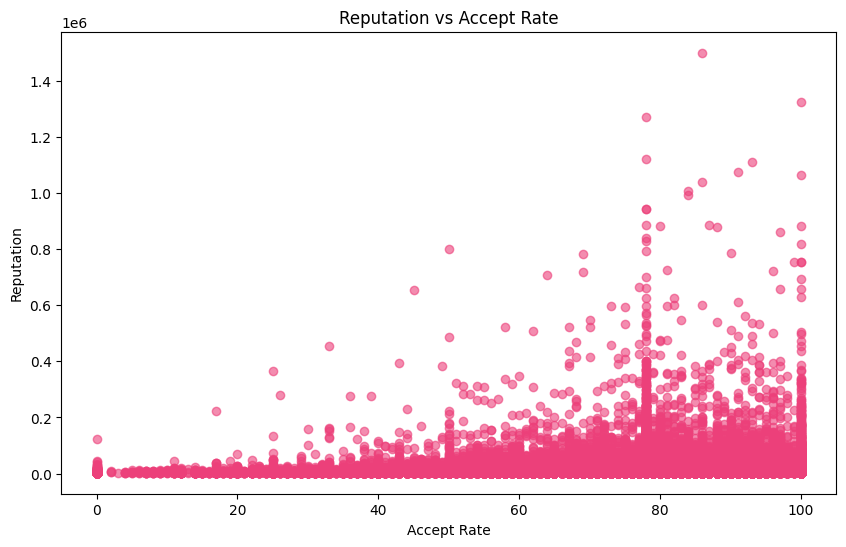

In [67]:
#Reputation vs Accept Rate
plt.figure(figsize=(10, 6))
plt.scatter(user_data['accept_rate'], user_data['reputation'], color='#ec407a', alpha=0.6)
plt.xlabel('Accept Rate')
plt.ylabel('Reputation')
plt.title('Reputation vs Accept Rate')
plt.show()

Visualization: A scatterplot showing the relationship between 'Reputation' and 'Accept Rate', with data points distributed across varying values of both variables.

Insight: The plot reveals a positive trend where higher accept rates tend to be associated with higher reputations. However, there is a significant concentration of users with low reputation across all accept rate levels, indicating that reputation growth might require consistent high acceptance over time or other factors.

<Figure size 1000x600 with 0 Axes>

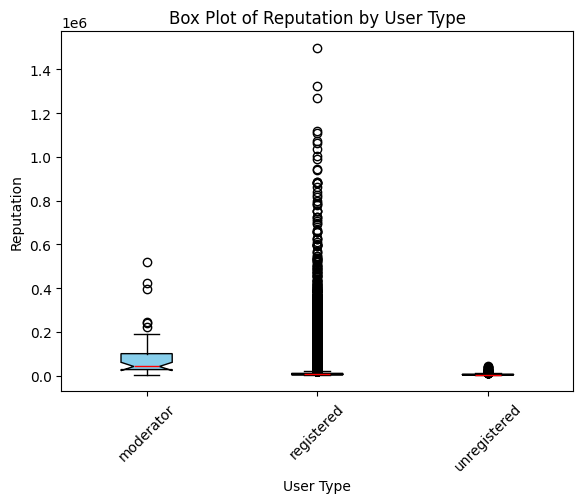

In [68]:
plt.figure(figsize=(10, 6))
user_data.boxplot(column='reputation', by='user_type', grid=False, notch=True, patch_artist=True,
                  boxprops=dict(facecolor='skyblue', color='black'),
                  medianprops=dict(color='red'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'))

plt.title('Box Plot of Reputation by User Type')
plt.suptitle('') 
plt.xlabel('User Type')
plt.ylabel('Reputation')
plt.xticks(rotation=45)
plt.show()

Visualization: A box plot showing the distribution of user reputation categorized by user types: moderator, registered, and unregistered.

Insight: Registered users show a wide spread in reputation with many outliers, including extremely high reputations. Moderators have a relatively consistent reputation range with fewer outliers, while unregistered users have minimal reputation variations.

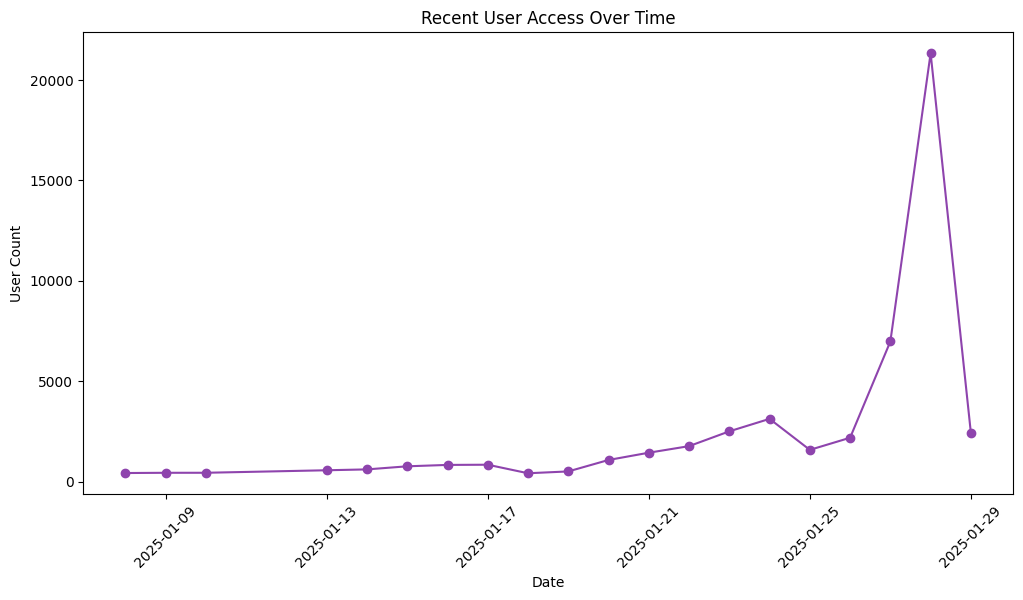

In [69]:
#Most Recent User Access Dates
recent_access = user_data['last_access_date'].dt.date.value_counts().head(20).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(recent_access.index, recent_access.values, marker='o', color='#8e44ad')
plt.xlabel('Date')
plt.ylabel('User Count')
plt.title('Recent User Access Over Time')
plt.xticks(rotation=45)
plt.show()


Visualization: A line plot illustrating the number of users accessing the platform over time in January 2025.

Insight: There is a steady, minimal user access trend until late January, followed by a sharp spike around January 29th, potentially due to a major event or system update, before the user count declines quickly after.